<a href="https://colab.research.google.com/github/vrathi101/SIGCOMMInclusivity/blob/main/SIGCOMMData_Finalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install and import libraries which will be used
!pip install ipywidgets
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns
from scipy.stats import kendalltau

In [ ]:
#read the csv of the latest version of the dataframe which has been updated throughout the Google Colabs
from google.colab import drive
drive.mount('/content/gdrive')
proj_path = '/content/gdrive/MyDrive/Colab Notebooks/save_data/people_weave/'
dfSigcomm = pd.read_csv(proj_path + 'SIGCOMMNamesAdjusted.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Filling in the dataframe Gender column based on the columns DirectMatch, FuzzyMatching, and GenderGuesser which receive priority in the order listed.

In [ ]:
#create an empty Gender column
dfSigcomm['Gender']=''

#GenderFullNameMatch checked first
dfSigcomm['Gender'] = dfSigcomm['Gender'].replace('', np.nan)
dfSigcomm['Gender'] = dfSigcomm['Gender'].fillna(dfSigcomm['DirectMatch'])

#FuzzyMatching checked second
dfSigcomm['Gender'] = dfSigcomm['Gender'].fillna(dfSigcomm['FuzzyMatch'])
dfSigcomm

,name,year,committee,region,cleanedName,cleanedRegion,Continent,DirectMatch,FuzzyMatch,ApproximateDoctoralGradYear,Gender
0,Pablo Rodriguez,2009,Organizing,"Telefonica Research, Spain",Pablo Rodriguez,"Telefonica Research, Spain",Europe,NaN,Male,2000,Male
1,Ernst Biersack,2009,Organizing,"Eurecom, France",Ernst Biersack,"Eurecom, France",Europe,NaN,Male,1988,Male
2,Konstantina Papagiannaki,2009,Organizing,"Intel Labs Pittsburgh, USA",Konstantina Papagiannaki,"Intel Labs Pittsburgh, USA",North America,NaN,Female,2003,Female
3,Luigi Rizzo,2009,Organizing,"Universit� di Pisa, Italy",Luigi Rizzo,"Universit di Pisa, Italy",Europe,Male,Male,1998,Male
4,Christophe Diot,2009,Organizing,"Thomson, France",Christophe Diot,"Thomson, France",Europe,Male,Male,1991,Male
...,...,...,...,...,...,...,...,...,...,...,...
1225,Yiting Xia,2023,Program,Max Planck Institute for Informatics,Yiting Xia,Max Planck Institute for Informatics,Europe,Female,Female,2018,Female
1226,Yiying Zhang,2023,Program,"University of California, San Diego",Yiying Zhang,"University of California, San Diego",North America,Female,Female,2019,Female
1227,Yu Hua,2023,Program,Huazhong University of Science and Technology,Yu Hua,Huazhong University of Science and Technology,Asia,Male,Male,2005,Male
1228,Yunxin Liu,2023,Program,"Institute for AI Industry Research (AIR), Tsin...",Yunxin Liu,"Institute for AI Industry Research (AIR), Tsin...",Asia,Male,Male,2011,Male


Determining the method used to find gender based on which columns had empty values vs. non-empty values.

In [ ]:
dfSigcomm['Source'] = ''
for index, row in dfSigcomm.iterrows():
  # if column A is nonempty, fill in Source (method) with column A method name
  if not pd.isnull(row['DirectMatch']):
    dfSigcomm.loc[index, 'Source'] = 'FullNameMatch'
  # if column A is empty and column B is nonempty, fill in Source with column B method name
  elif pd.isnull(row['DirectMatch']) and pd.notna(row['FuzzyMatch']):
    dfSigcomm.loc[index, 'Source'] = 'FuzzyMatch'
dfSigcomm.head(10)

,name,year,committee,region,cleanedName,cleanedRegion,Continent,DirectMatch,FuzzyMatch,ApproximateDoctoralGradYear,Gender,Source
0,Pablo Rodriguez,2009,Organizing,"Telefonica Research, Spain",Pablo Rodriguez,"Telefonica Research, Spain",Europe,NaN,Male,2000,Male,FuzzyMatch
1,Ernst Biersack,2009,Organizing,"Eurecom, France",Ernst Biersack,"Eurecom, France",Europe,NaN,Male,1988,Male,FuzzyMatch
2,Konstantina Papagiannaki,2009,Organizing,"Intel Labs Pittsburgh, USA",Konstantina Papagiannaki,"Intel Labs Pittsburgh, USA",North America,NaN,Female,2003,Female,FuzzyMatch
3,Luigi Rizzo,2009,Organizing,"Universit� di Pisa, Italy",Luigi Rizzo,"Universit di Pisa, Italy",Europe,Male,Male,1998,Male,FullNameMatch
4,Christophe Diot,2009,Organizing,"Thomson, France",Christophe Diot,"Thomson, France",Europe,Male,Male,1991,Male,FullNameMatch
5,Dolors Sala,2009,Organizing,"Universitat Pompeu Fabra, Spain",Dolors Sala,"Universitat Pompeu Fabra, Spain",Europe,Female,Female,1998,Female,FullNameMatch
6,Jaudelice de Oliveira,2009,Organizing,"Drexel University, USA",Jaudelice de Oliveira,"Drexel University, USA",North America,Female,Female,2003,Female,FullNameMatch
7,Balachander Krishnamurthy,2009,Organizing,AT&T Labs,Balachander Krishnamurthy,AT&T Labs,North America,Male,Male,None,Male,FullNameMatch
8,Antony Rowstron,2009,Organizing,"Microsoft Research, UK",Antony Rowstron,"Microsoft Research, UK",Europe,Male,Male,1996,Male,FullNameMatch
9,Laurent Mathy,2009,Organizing,"Lancaster University, UK",Laurent Mathy,"Lancaster University, UK",Europe,Male,Male,2000,Male,FullNameMatch


We write the current dataframe into a CSV file.

In [ ]:
dfSigcomm.to_csv("/content/gdrive/My Drive/Colab Notebooks/save_data/people_weave/SIGCOMMNamesFinal.csv", sep=',', index=False, encoding='utf-8')

Adding interactivity to the dataframe so users can organize or visualize the dataframe in different ways, using ipywidgets.

In [ ]:
# Assuming 'df' is your DataFrame
for index, row in dfSigcomm.iterrows():
    if pd.isnull(row["Gender"]):
        print(row)

In [ ]:
#FILTERING
column_dropdown = widgets.Dropdown(options=dfSigcomm.columns)
value_input = widgets.Text(placeholder="Enter value")
def apply_filter(column, value):
  filtered_df = dfSigcomm[dfSigcomm[column] == value]
  display(filtered_df)
widgets.interact(apply_filter, column=column_dropdown, value=value_input)

interactive(children=(Dropdown(description='column', options=('name', 'year', 'committee', 'region', 'cleanedN…

<function __main__.apply_filter(column, value)>

In [ ]:
#SORTING
sort_button = widgets.Button(description='Sort')
def sort_dataframe(_):
  column = column_dropdown.value
  df_sorted = dfSigcomm.sort_values(by=column)
  display(df_sorted)
sort_button.on_click(sort_dataframe)
widgets.VBox([column_dropdown, sort_button])

In [ ]:
#AGGREGATING
aggregation_dropdown = widgets.Dropdown(options=['sum', 'mean', 'count'])
aggregate_button = widgets.Button(description='Aggregate')
def aggregate_dataframe(_):
  column = column_dropdown.value
  aggregation = aggregation_dropdown.value
  result = dfSigcomm.groupby(column)[column].agg(aggregation)
  display(result)
aggregate_button.on_click(aggregate_dataframe)
widgets.VBox([column_dropdown, aggregation_dropdown, aggregate_button])

In [ ]:
#PIVOT TABLES (2 columns)
column1_dropdown = widgets.Dropdown(options=list(dfSigcomm.columns))
column2_dropdown = widgets.Dropdown(options=list(dfSigcomm.columns))
count_button = widgets.Button(description='Count')
def count_columns(_):
  column1 = column1_dropdown.value
  column2 = column2_dropdown.value
  counts = pd.crosstab(dfSigcomm[column1], dfSigcomm[column2])
  display(counts)
count_button.on_click(count_columns)
widgets.VBox([column1_dropdown, column2_dropdown, count_button])

In [ ]:
#PIVOT TABLES (any number of columns)
column_checkboxes = [widgets.Checkbox(description=col, value=False) for col in dfSigcomm.columns]
count_button = widgets.Button(description='Count')
def count_columns(_):
    selected_columns = [checkbox.description for checkbox in column_checkboxes if checkbox.value]
    if len(selected_columns) < 2:
        print("Please select at least two columns.")
        return
    counts = dfSigcomm.groupby(selected_columns).size().reset_index(name='Count')
    display(counts)
count_button.on_click(count_columns)
widgets.VBox([widgets.HBox(column_checkboxes), count_button])

In [ ]:
#PLOTTING
x_dropdown = widgets.Dropdown(options=list(dfSigcomm.columns))
y_dropdown = widgets.Dropdown(options=list(dfSigcomm.columns))
plot_button = widgets.Button(description='Plot')
def create_plot(_):
    x_column = x_dropdown.value
    y_column = y_dropdown.value
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dfSigcomm, x=x_column, hue=y_column)
    plt.xlabel(x_column)
    plt.ylabel('Count')
    plt.legend(title=y_column)
    plt.show()
plot_button.on_click(create_plot)
widgets.VBox([x_dropdown, y_dropdown, plot_button])

Making graphs showing the changes of gender distribution (as a percentage and as a count) for each of the two committee types over the 15-year span.

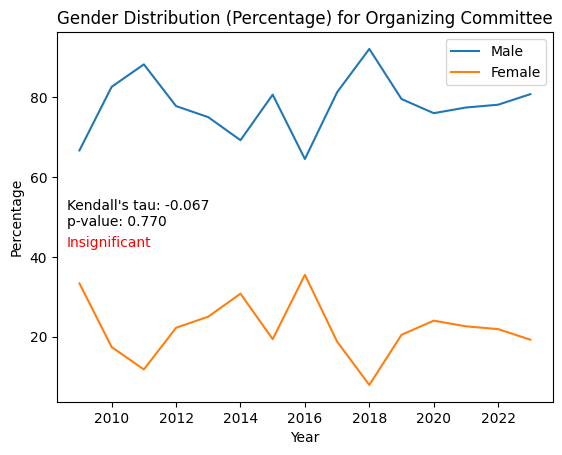

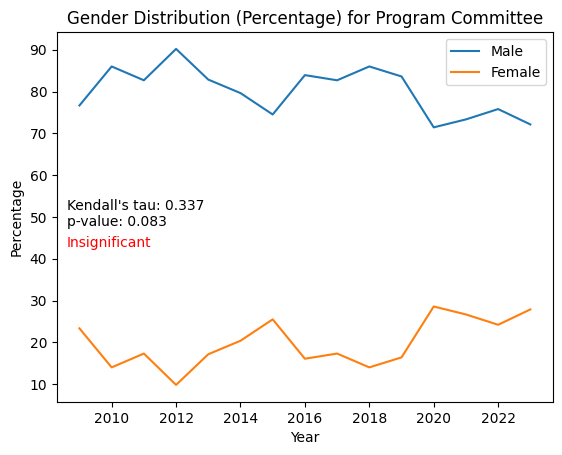

In [ ]:
# Get unique committee and year values from the DataFrame
committees = dfSigcomm['committee'].unique()
years = dfSigcomm['year'].unique()

# Get unique continent values from the "Continent" column
genders = dfSigcomm['Gender'].unique()

# Create separate line graphs for each committee
for committee in committees:
    # Create a figure and axis for the current committee
    fig, ax = plt.subplots()

    # Loop through each continent
    for gender in genders:
        # Create an empty list to store the percentages for each year
        percentages = []

        # Loop through each year
        for year in years:
            # Filter the DataFrame for the current committee, continent, and year
            df_filtered = dfSigcomm[(dfSigcomm['committee'] == committee) & (dfSigcomm['Gender'] == gender) & (dfSigcomm['year'] == year)]

            # Get the count of members for the current continent and year
            count = len(df_filtered)

            # Calculate the percentage by dividing the count by the total count for the committee and year
            total_count = len(dfSigcomm[(dfSigcomm['committee'] == committee) & (dfSigcomm['year'] == year)])
            percentage = (count / total_count) * 100

            # Append the percentage to the list
            percentages.append(percentage)

        # Perform the Mann-Kendall test
        tau, p_value = kendalltau(percentages, years)

        # Plot the percentages as a line graph for the current continent
        ax.plot(years, percentages, label=gender)

    # Configure the plot
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage')
    ax.set_title(f'Gender Distribution (Percentage) for {committee} Committee')
    ax.text(0.02, 0.55, f"Kendall's tau: {tau:.3f}\np-value: {p_value:.3f}", transform=ax.transAxes, verticalalignment='top')
    if p_value < 0.05:
      ax.text(0.02, 0.45, "Significant", transform=ax.transAxes, verticalalignment='top', color='green')
    else:
      ax.text(0.02, 0.45, "Insignificant", transform=ax.transAxes, verticalalignment='top', color='red')
    ax.legend()

    # Display the plot
    plt.show()

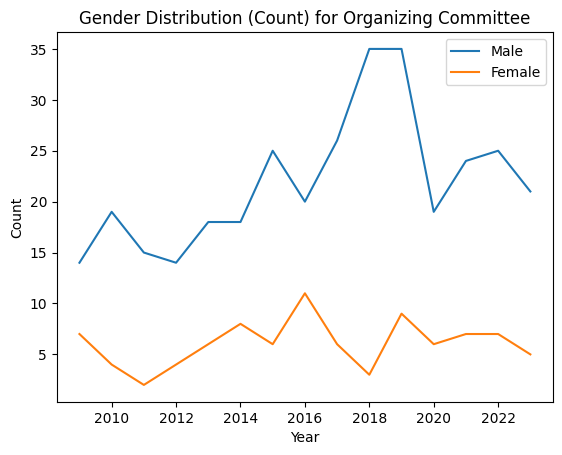

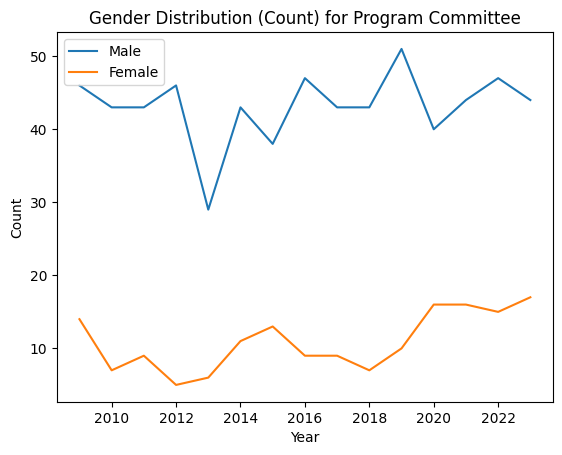

In [ ]:
# Get unique committee and year values from the DataFrame
committees = dfSigcomm['committee'].unique()
years = dfSigcomm['year'].unique()

# Get unique continent values from the "Continent" column
genders = dfSigcomm['Gender'].unique()

# Create separate line graphs for each committee
for committee in committees:
    # Create a figure and axis for the current committee
    fig, ax = plt.subplots()

    # Loop through each continent
    for gender in genders:
        # Create an empty list to store the counts for each year
        counts = []

        # Loop through each year
        for year in years:
            # Filter the DataFrame for the current committee, continent, and year
            df_filtered = dfSigcomm[(dfSigcomm['committee'] == committee) & (dfSigcomm['Gender'] == gender) & (dfSigcomm['year'] == year)]

            # Get the count of members for the current continent and year
            count = len(df_filtered)

            # Append the count to the list
            counts.append(count)

        # Plot the counts as a line graph for the current continent
        ax.plot(years, counts, label=gender)

    # Configure the plot
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    ax.set_title(f'Gender Distribution (Count) for {committee} Committee')
    ax.legend()

    # Display the plot
    plt.show()

Making graphs showing the changes of geographic distribution (as a percentage and as a count) for each of the two committee types over the 15-year span.

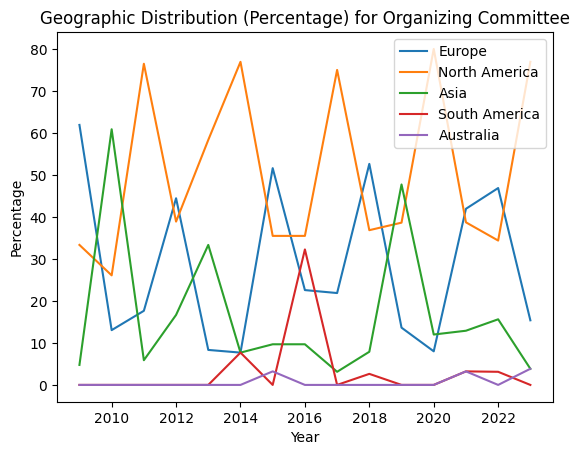

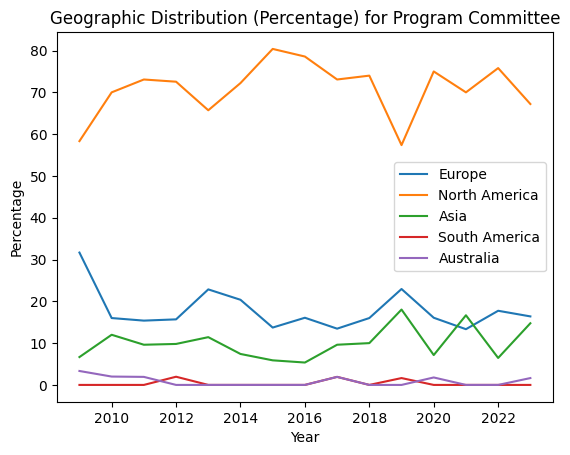

In [ ]:
# Get unique committee and year values from the DataFrame
committees = dfSigcomm['committee'].unique()
years = dfSigcomm['year'].unique()

# Get unique continent values from the "Continent" column
continents = dfSigcomm['Continent'].unique()

# Create separate line graphs for each committee
for committee in committees:
    # Create a figure and axis for the current committee
    fig, ax = plt.subplots()

    # Loop through each continent
    for continent in continents:
        # Create an empty list to store the percentages for each year
        percentages = []

        # Loop through each year
        for year in years:
            # Filter the DataFrame for the current committee, continent, and year
            df_filtered = dfSigcomm[(dfSigcomm['committee'] == committee) & (dfSigcomm['Continent'] == continent) & (dfSigcomm['year'] == year)]

            # Get the count of members for the current continent and year
            count = len(df_filtered)

            # Calculate the percentage by dividing the count by the total count for the committee and year
            total_count = len(dfSigcomm[(dfSigcomm['committee'] == committee) & (dfSigcomm['year'] == year)])
            percentage = (count / total_count) * 100

            # Append the percentage to the list
            percentages.append(percentage)
        # Plot the percentages as a line graph for the current continent
        ax.plot(years, percentages, label=continent)

    # Configure the plot
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage')
    ax.set_title(f'Geographic Distribution (Percentage) for {committee} Committee')
    ax.legend()

    # Display the plot
    plt.show()

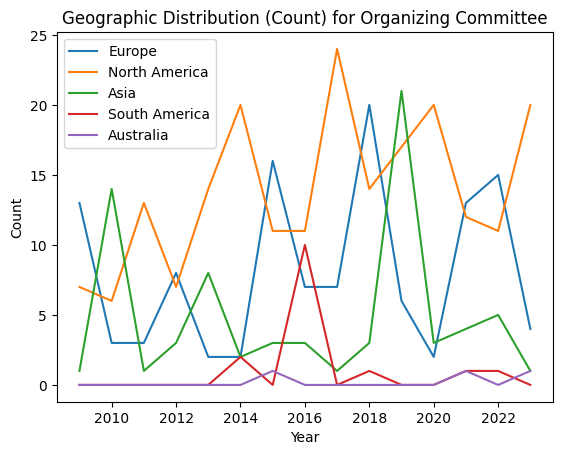

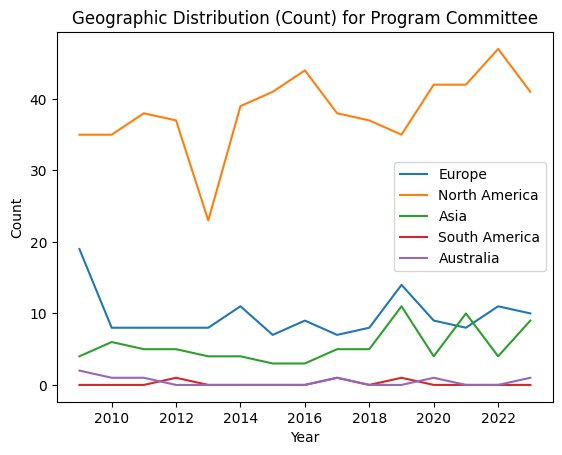

In [ ]:
# Get unique committee and year values from the DataFrame
committees = dfSigcomm['committee'].unique()
years = dfSigcomm['year'].unique()

# Get unique continent values from the "Continent" column
continents = dfSigcomm['Continent'].unique()

# Create separate line graphs for each committee
for committee in committees:
    # Create a figure and axis for the current committee
    fig, ax = plt.subplots()

    # Loop through each continent
    for continent in continents:
        # Create an empty list to store the counts for each year
        counts = []

        # Loop through each year
        for year in years:
            # Filter the DataFrame for the current committee, continent, and year
            df_filtered = dfSigcomm[(dfSigcomm['committee'] == committee) & (dfSigcomm['Continent'] == continent) & (dfSigcomm['year'] == year)]

            # Get the count of members for the current continent and year
            count = len(df_filtered)

            # Append the count to the list
            counts.append(count)

        # Plot the counts as a line graph for the current continent
        ax.plot(years, counts, label=continent)

    # Configure the plot
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    ax.set_title(f'Geographic Distribution (Count) for {committee} Committee')
    ax.legend()

    # Display the plot
    plt.show()

Making graphs showing the (1) average doctoral degree graduation year and (2) the difference between the doctoral degree graduation year and the year of the conference, for each of the two committee types over the 15-year span. We exclude people whose doctoral degree information was not found.

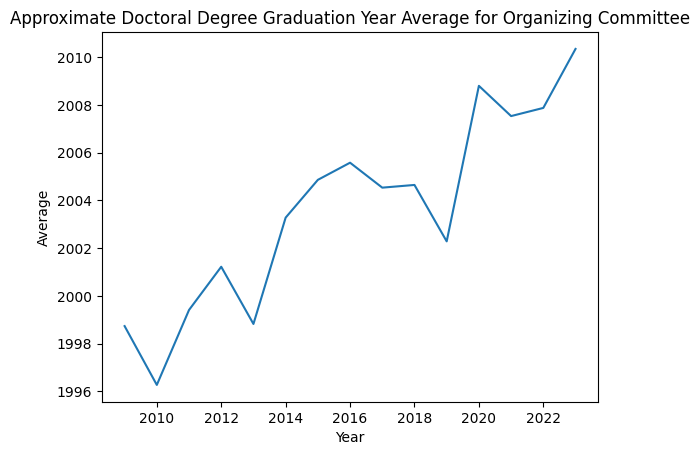

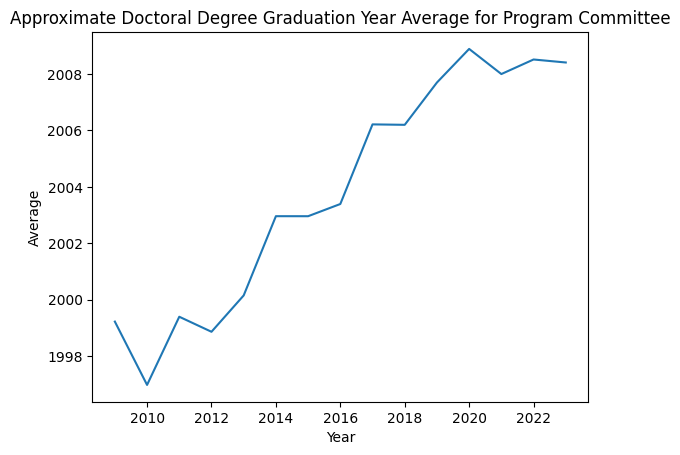

In [ ]:
# Get unique committee and year values from the DataFrame
committees = dfSigcomm['committee'].unique()
years = dfSigcomm['year'].unique()

for committee in committees:
    # Create a new figure and axes for each committee
    fig, ax = plt.subplots()
    # Initialize an empty list to store the average values
    averages = []

    for year in years:
        # Initialize the sum of graduation years to 0 for each committee and year
        age_sum = 0

        # Filter the dataframe for the specific committee and year
        committee_year_df = dfSigcomm[(dfSigcomm['committee'] == committee) & (dfSigcomm['year'] == year)]
        committee_year_df = committee_year_df[~committee_year_df['ApproximateDoctoralGradYear'].isin(['None', '?', 'Phd'])]
        committee_year_df['ApproximateDoctoralGradYear'] = pd.to_numeric(committee_year_df['ApproximateDoctoralGradYear'], errors='coerce')
        # Count the number of records for the specific committee and year
        total_count = len(committee_year_df)

        if total_count > 0:
            # Calculate the sum of 'ApproximateDoctoralGradYear' for the specific committee and year
            age_sum = committee_year_df['ApproximateDoctoralGradYear'].sum()

            # Calculate the average graduation year for the specific committee and year
            average = age_sum / total_count

        # Append the average to the list of averages
        averages.append(average)

    # Plot the averages as a line graph for the current year
    ax.plot(years, averages)

    # Configure the plot
    ax.set_xlabel('Year')
    ax.set_ylabel('Average')
    ax.set_title(f'Approximate Doctoral Degree Graduation Year Average for {committee} Committee')

    # Display the plot
    plt.show()


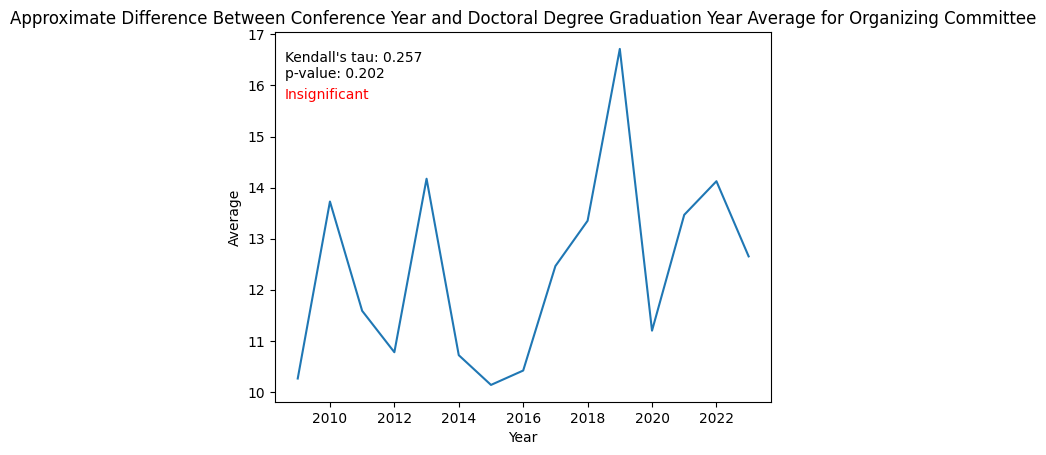

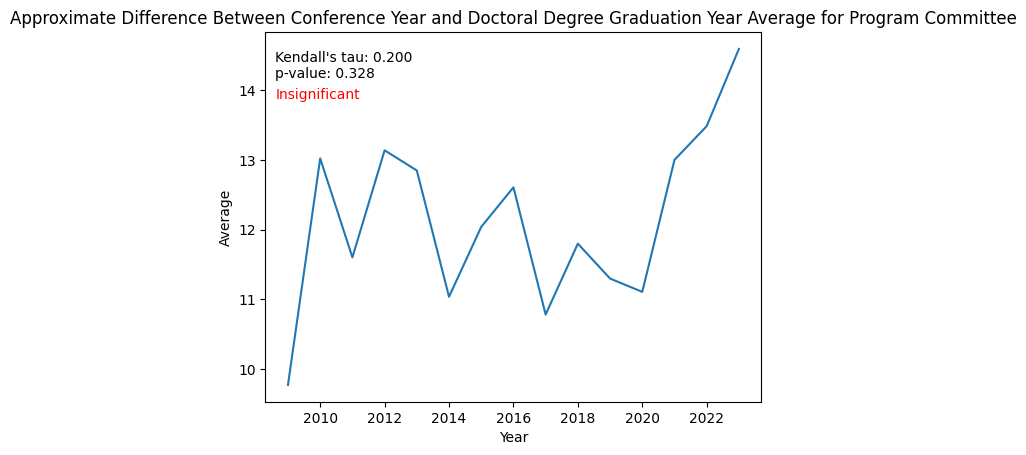

In [ ]:
# Get unique committee and year values from the DataFrame
committees = dfSigcomm['committee'].unique()
years = dfSigcomm['year'].unique()

for committee in committees:
    # Create a new figure and axes for each committee
    fig, ax = plt.subplots()
    # Initialize an empty list to store the average values
    differences = []

    for year in years:
        # Initialize the sum of graduation years to 0 for each committee and year
        age_sum = 0

        # Filter the dataframe for the specific committee and year
        committee_year_df = dfSigcomm[(dfSigcomm['committee'] == committee) & (dfSigcomm['year'] == year)]
        committee_year_df = committee_year_df[~committee_year_df['ApproximateDoctoralGradYear'].isin(['None', '?', 'Phd'])]
        committee_year_df['ApproximateDoctoralGradYear'] = pd.to_numeric(committee_year_df['ApproximateDoctoralGradYear'], errors='coerce')
        # Count the number of records for the specific committee and year
        total_count = len(committee_year_df)

        if total_count > 0:
            # Calculate the sum of 'ApproximateDoctoralGradYear' for the specific committee and year
            age_sum = committee_year_df['ApproximateDoctoralGradYear'].sum()

            # Calculate the average graduation year for the specific committee and year
            average = age_sum / total_count
            difference = abs(year - average)
        # Append the average to the list of averages
        differences.append(difference)

    # Perform the Mann-Kendall test
    tau, p_value = kendalltau(differences, years)

    # Plot the averages as a line graph for the current year
    ax.plot(years, differences)

    # Configure the plot
    ax.set_xlabel('Year')
    ax.set_ylabel('Average')
    ax.set_title(f'Approximate Difference Between Conference Year and Doctoral Degree Graduation Year Average for {committee} Committee')
    ax.text(0.02, 0.95, f"Kendall's tau: {tau:.3f}\np-value: {p_value:.3f}", transform=ax.transAxes, verticalalignment='top')
    if p_value < 0.05:
      ax.text(0.02, 0.85, "Significant", transform=ax.transAxes, verticalalignment='top', color='green')
    else:
      ax.text(0.02, 0.85, "Insignificant", transform=ax.transAxes, verticalalignment='top', color='red')

    # Display the plot
    plt.show()


<ipython-input-34-1ab4536d161f>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  committee_year_male_df['ApproximateDoctoralGradYear'] = pd.to_numeric(committee_year_male_df['ApproximateDoctoralGradYear'], errors='coerce')


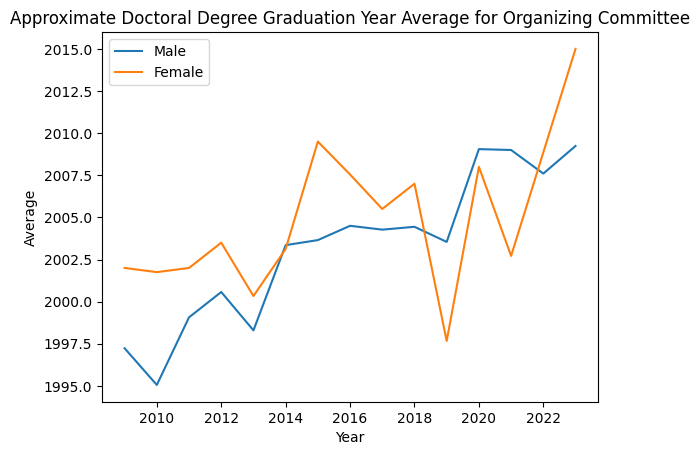

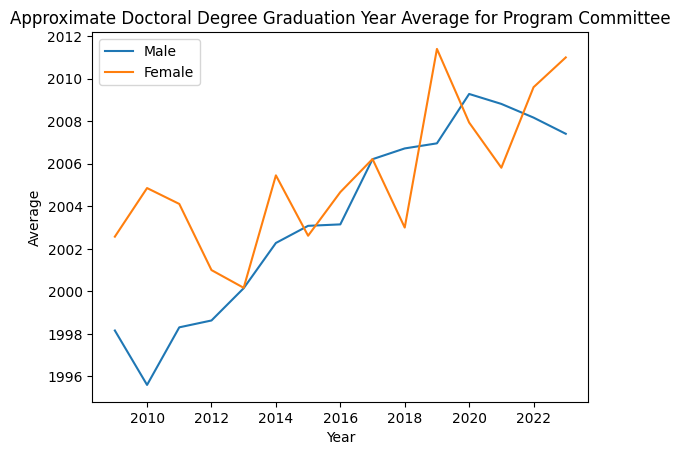

In [ ]:
# Get unique committee and year values from the DataFrame
committees = dfSigcomm['committee'].unique()
years = dfSigcomm['year'].unique()

# Create a new figure and axes for each committee
for committee in committees:
    fig, ax = plt.subplots()
    # Initialize empty lists to store the average values for male and female
    averages_male = []
    averages_female = []

    for year in years:
        # Initialize the sum of graduation years to 0 for each committee and year
        age_sum_male = 0
        age_sum_female = 0

        # Filter the dataframe for the specific committee, year, and gender
        committee_year_male_df = dfSigcomm[(dfSigcomm['committee'] == committee) & (dfSigcomm['year'] == year) & (dfSigcomm['Gender'] == 'Male')]
        committee_year_female_df = dfSigcomm[(dfSigcomm['committee'] == committee) & (dfSigcomm['year'] == year) & (dfSigcomm['Gender'] == 'Female')]

        committee_year_male_df = committee_year_male_df[~committee_year_male_df['ApproximateDoctoralGradYear'].isin(['None', '?', 'Phd'])]
        committee_year_female_df = committee_year_female_df[~committee_year_female_df['ApproximateDoctoralGradYear'].isin(['None', '?', 'Phd'])]

        committee_year_male_df['ApproximateDoctoralGradYear'] = pd.to_numeric(committee_year_male_df['ApproximateDoctoralGradYear'], errors='coerce')
        committee_year_female_df['ApproximateDoctoralGradYear'] = pd.to_numeric(committee_year_female_df['ApproximateDoctoralGradYear'], errors='coerce')

        # Count the number of records for male and female
        count_male = len(committee_year_male_df)
        count_female = len(committee_year_female_df)

        if count_male > 0:
            # Calculate the sum of 'ApproximateDoctoralGradYear' for male
            age_sum_male = committee_year_male_df['ApproximateDoctoralGradYear'].sum()

            # Calculate the average graduation year for male
            average_male = age_sum_male / count_male

        if count_female > 0:
            # Calculate the sum of 'ApproximateDoctoralGradYear' for female
            age_sum_female = committee_year_female_df['ApproximateDoctoralGradYear'].sum()

            # Calculate the average graduation year for female
            average_female = age_sum_female / count_female

        # Append the averages to the respective lists
        averages_male.append(average_male)
        averages_female.append(average_female)

    # Plot the averages as separate lines for male and female
    ax.plot(years, averages_male, label='Male')
    ax.plot(years, averages_female, label='Female')

    # Configure the plot
    ax.set_xlabel('Year')
    ax.set_ylabel('Average')
    ax.set_title(f'Approximate Doctoral Degree Graduation Year Average for {committee} Committee')
    ax.legend()

    # Display the plot
    plt.show()


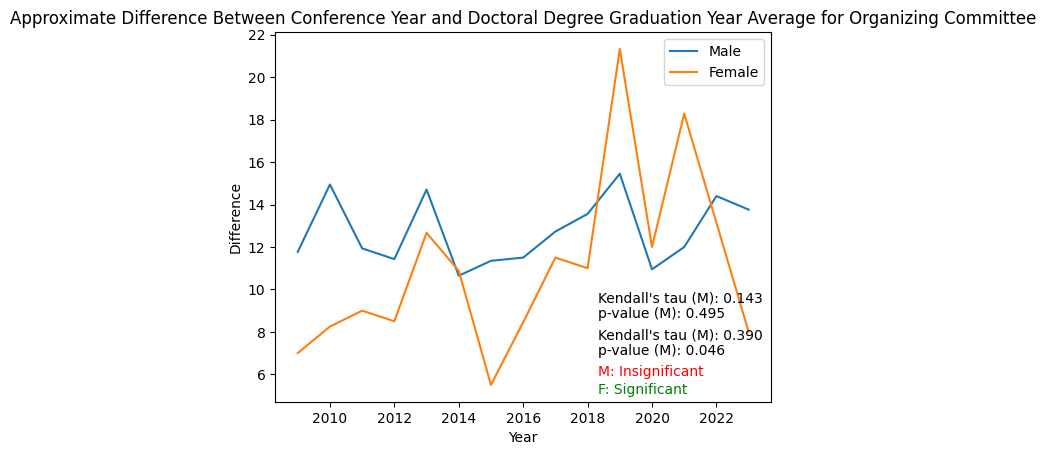

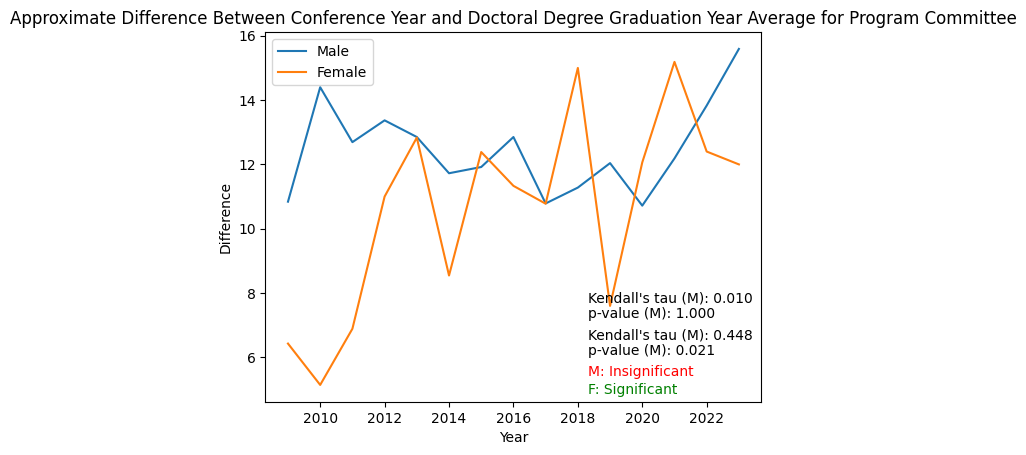

In [ ]:
# Get unique committee and year values from the DataFrame
committees = dfSigcomm['committee'].unique()
years = dfSigcomm['year'].unique()

# Create a new figure and axes for each committee
for committee in committees:
    fig, ax = plt.subplots()
    # Initialize empty lists to store the differences for male and female
    differences_male = []
    differences_female = []

    for year in years:
        # Initialize the sum of graduation years to 0 for each committee and year
        age_sum_male = 0
        age_sum_female = 0

        # Filter the dataframe for the specific committee, year, and gender
        committee_year_male_df = dfSigcomm[(dfSigcomm['committee'] == committee) & (dfSigcomm['year'] == year) & (dfSigcomm['Gender'] == 'Male')]
        committee_year_female_df = dfSigcomm[(dfSigcomm['committee'] == committee) & (dfSigcomm['year'] == year) & (dfSigcomm['Gender'] == 'Female')]

        committee_year_male_df = committee_year_male_df[~committee_year_male_df['ApproximateDoctoralGradYear'].isin(['None', '?', 'Phd'])]
        committee_year_female_df = committee_year_female_df[~committee_year_female_df['ApproximateDoctoralGradYear'].isin(['None', '?', 'Phd'])]

        committee_year_male_df['ApproximateDoctoralGradYear'] = pd.to_numeric(committee_year_male_df['ApproximateDoctoralGradYear'], errors='coerce')
        committee_year_female_df['ApproximateDoctoralGradYear'] = pd.to_numeric(committee_year_female_df['ApproximateDoctoralGradYear'], errors='coerce')

        # Count the number of records for male and female
        count_male = len(committee_year_male_df)
        count_female = len(committee_year_female_df)

        if count_male > 0:
            # Calculate the sum of 'ApproximateDoctoralGradYear' for male
            age_sum_male = committee_year_male_df['ApproximateDoctoralGradYear'].sum()

            # Calculate the average graduation year for male
            average_male = age_sum_male / count_male
            difference_male = abs(year - average_male)

        if count_female > 0:
            # Calculate the sum of 'ApproximateDoctoralGradYear' for female
            age_sum_female = committee_year_female_df['ApproximateDoctoralGradYear'].sum()

            # Calculate the average graduation year for female
            average_female = age_sum_female / count_female
            difference_female = abs(year - average_female)

        # Append the differences to the respective lists
        differences_male.append(difference_male)
        differences_female.append(difference_female)

    # Perform the Mann-Kendall test
    tau_male, p_value_male = kendalltau(differences_male, years)
    tau_female, p_value_female = kendalltau(differences_female, years)

    # Plot the differences as separate lines for male and female
    ax.plot(years, differences_male, label='Male')
    ax.plot(years, differences_female, label='Female')

    # Configure the plot
    ax.set_xlabel('Year')
    ax.set_ylabel('Difference')
    ax.set_title(f'Approximate Difference Between Conference Year and Doctoral Degree Graduation Year Average for {committee} Committee')
    ax.text(0.65, 0.30, f"Kendall's tau (M): {tau_male:.3f}\np-value (M): {p_value_male:.3f}", transform=ax.transAxes, verticalalignment='top')
    ax.text(0.65, 0.20, f"Kendall's tau (M): {tau_female:.3f}\np-value (M): {p_value_female:.3f}", transform=ax.transAxes, verticalalignment='top')
    if p_value_male < 0.05:
        ax.text(0.65, 0.10, "M: Significant", transform=ax.transAxes, verticalalignment='top', color='green')
    else:
        ax.text(0.65, 0.10, "M: Insignificant", transform=ax.transAxes, verticalalignment='top', color='red')
    if p_value_female < 0.05:
        ax.text(0.65, 0.05, "F: Significant", transform=ax.transAxes, verticalalignment='top', color='green')
    else:
        ax.text(0.65, 0.05, "F: Insignificant", transform=ax.transAxes, verticalalignment='top', color='red')

    ax.legend()

    # Display the plot
    plt.show()
